In [39]:
# PCA for read data and plotting
from sklearn.cluster import KMeans
import sklearn.datasets
import matplotlib.pyplot as plt

dataset = sklearn.datasets.load_iris(as_frame=True)

X = (dataset
     ['data']
     .loc[:, ['sepal length (cm)', 'sepal width (cm)']]
)
y = dataset['target']

X


,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)




In [41]:
X_pca

,pca0,pca1
0,-0.778148,0.378133
1,-0.935090,-0.137007
2,-1.151308,0.045339
3,-1.242481,-0.062770
4,-0.886256,0.469306
...,...,...
145,0.858445,0.015414
146,0.502221,-0.516662
147,0.659163,-0.001522
148,0.326369,0.371638


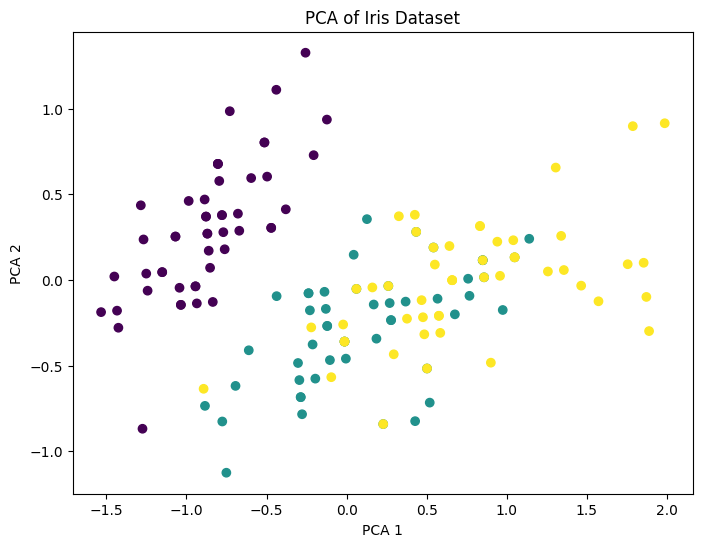

In [43]:
#plot the result
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], c=y, cmap='viridis')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title('PCA of Iris Dataset')
plt.show()


In [44]:
X

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


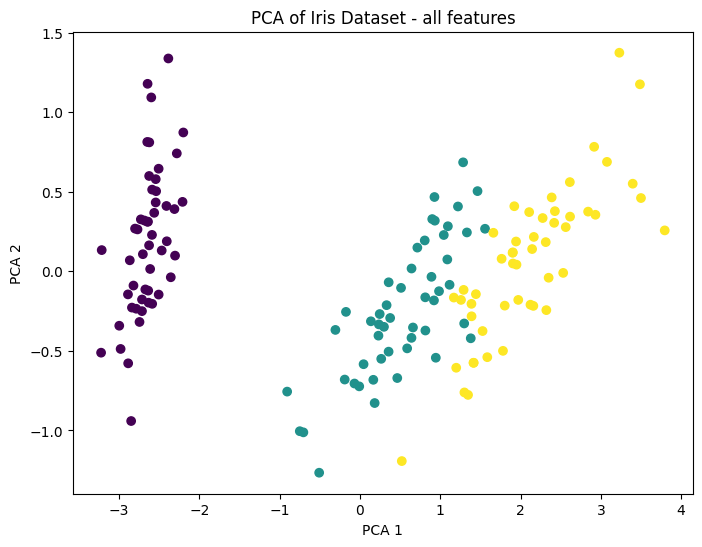

In [46]:
# run PCA on all of the Iris dataset
pca = PCA()

X_all = ( dataset
         ['data']
         #.loc[:, ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
            )

pca.fit(X_all)
X_pca = pca.transform(X_all)

#plot to first 2 components
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], c=y, cmap='viridis')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title('PCA of Iris Dataset - all features')  
plt.show()  


In [47]:
#tell sklearn to output pandas dataframes   
sklearn.set_config(transform_output='pandas')

pca.transform(X_all)



,pca0,pca1,pca2,pca3
0,-2.684126,0.319397,-0.027915,0.002262
1,-2.714142,-0.177001,-0.210464,0.099027
2,-2.888991,-0.144949,0.017900,0.019968
3,-2.745343,-0.318299,0.031559,-0.075576
4,-2.728717,0.326755,0.090079,-0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,0.426196
146,1.527167,-0.375317,-0.121898,0.254367
147,1.764346,0.078859,0.130482,0.137001
148,1.900942,0.116628,0.723252,0.044595


In [48]:
#i don't like the column name , so i will rename them change pca0 to pca1 and pc1 to pca2, etc
def rename_pca_to_PC1(col):
    num = int(col[3:]) +1
    return 'PC' + str(num)

pca.transform(X_all).rename(columns=rename_pca_to_PC1)  


,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,0.002262
1,-2.714142,-0.177001,-0.210464,0.099027
2,-2.888991,-0.144949,0.017900,0.019968
3,-2.745343,-0.318299,0.031559,-0.075576
4,-2.728717,0.326755,0.090079,-0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,0.426196
146,1.527167,-0.375317,-0.121898,0.254367
147,1.764346,0.078859,0.130482,0.137001
148,1.900942,0.116628,0.723252,0.044595


Text(0.5, 1.0, 'Scree Plot')

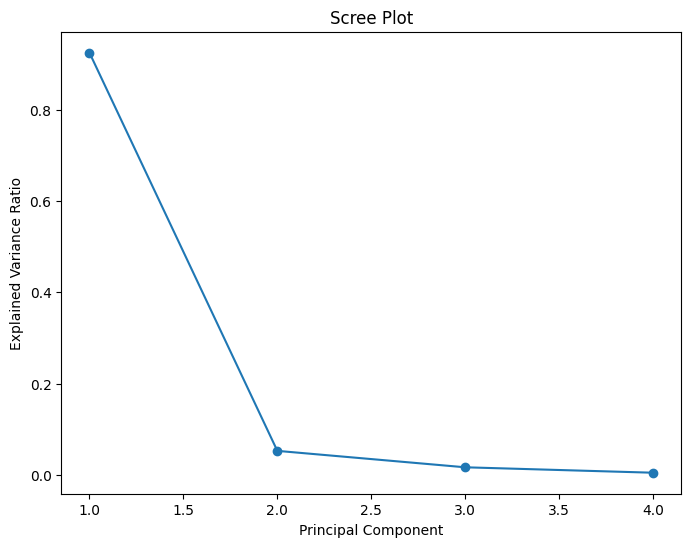

In [49]:
#screen plot of explained valiance ratio
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, len(pca.explained_variance_ratio_ ) +1), pca.explained_variance_ratio_, marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Scree Plot')


In [50]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [51]:
pca.explained_variance_ratio_.cumsum()


array([0.92461872, 0.97768521, 0.99478782, 1.        ])

In [52]:
X_all = X_all.mean()


In [56]:
import pandas as pd
feature_names = ['feature1', 'feature2', 'feature3', 'feature4']  # replace with actual names

components = pd.DataFrame(
    pca.components_,
    columns=feature_names,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

components


,feature1,feature2,feature3,feature4
PC1,0.361387,-0.084523,0.856671,0.358289
PC2,0.656589,0.730161,-0.173373,-0.075481
PC3,-0.582030,0.597911,0.076236,0.545831
PC4,0.315487,-0.319723,-0.479839,0.753657


In [ ]:
#manually calculate PCA with numpy
import numpy as np
nums = X_all - X_all.mean()
vals , vecs = np.linalg.eig(nums.cov())
idxs = pd.Series(vals).argsort()

explained_variance = pd.Series(sorted(vals, reverse=True))

def set_colname(df_):
    df_.columns = [f'PC{i+1}' for i in range(len(df_.columns))]
    return df_

comps = (pd.DataFrame(vecs,index=nums.columns)
            .iloc[:, idxs[::-1]]
            .pipe(set_colname)

            )

pcas = nums.dot(comps)
import plotly.io as pio
pio.renderers.default = "notebook"  # or "notebook_connected"
pcas

,PC1
sepal length (cm),2.378833
sepal width (cm),-0.407167
petal length (cm),0.293500
petal width (cm),-2.265167


In [64]:
import plotly.io as pio
pio.renderers.default = "notebook"  # or "notebook_connected"


In [84]:
import plotly.express as px
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# PCA (3D)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# DataFrame
df_pca = X_pca.rename(columns={'pca0':'PC1','pca1':'PC2','pca2':'PC3'})
df_pca['label'] = y

df_pca['species'] = df_pca['label'].map({0:"Setosa", 1:"Versicolor", 2:"Virginica"})

# 3D interactive scatter
fig = px.scatter_3d(
    df_pca,
    x="PC1", y="PC2", z="PC3",
    color="species",
    symbol="species",
    size_max=10,
    opacity=0.8,
    title="3D PCA of Iris Dataset (Interactive)"
)

fig.show()
